In [19]:
import numpy as np

A = np.array([[2,0], [1,5]])
v = np.array([3,4])

In [20]:
np.dot(A,v)

array([ 6, 23])

Eigenvector = (v) vector whose direction remains unchanged when a linear  transformation s applied to it. 


Eigenvalues = (a) represents the scalar value that is used such that when multiplied by v. gives the same value as Av. 

In [21]:
#We want to obtain a vector v and a scalar value a such that: 
# Av = av

In [22]:
A = np.array([[2, 0], [1, 5]])

eig_value, eig_vector = np.linalg.eig(A)

print(eig_value)
print(eig_vector)

[5. 2.]
[[ 0.          0.9486833 ]
 [ 1.         -0.31622777]]


In [31]:
#show that Av is equal to av 

A = np.array([[2, 0], [1, 5]])
v = np.array([0,1])

np.dot(A, v)

array([0, 5])

In [34]:
a*v

NameError: name 'a' is not defined

In [35]:
A = np.array([[2, 0], [1, 5]])
v = np.array([0.9486833,1])

np.dot(A, v)

array([1.8973666, 5.9486833])

In [36]:
a*v

NameError: name 'a' is not defined

In [37]:
#write a function that obtains the principle components from 17 types of food in UK 

In [40]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

# use pandas to read in the excel spreadsheet
df = pd.read_excel('./Datasets/pca_uk.xlsx')

# build a matrix of the feature values, not including the text labels
X = np.array([df[i].values for i in df.columns if i != 'Features'])

print(X)

# calculate the PCA
pca = PCA(n_components=2)

# Find the principle components of 17 features
X_r = pca.fit_transform(X)

print(X_r)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]]
[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]


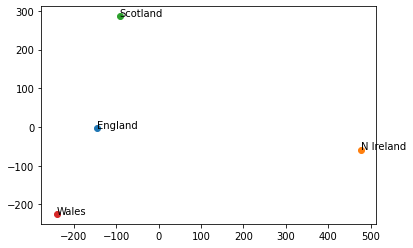

In [41]:
# Lets visualize the principle components

for feature, (plot_x,plot_y) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(plot_x, plot_y)
    plt.text(plot_x+0.3, plot_y+0.3, df.columns[:-1][feature])

plt.show()

In [51]:
# How much of the information in the original dataset is preserved in the principle components?
import scipy


# PCA computation by sklearn
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]
[105073.34576714  45261.62487597]
[0.67444346 0.29052475]
[0.67444346 0.96496821]


In [52]:
print('Correlation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))

Correlation of PCA Component:
(0.0, 1.0)


### PC1             

[[-144.99315218
[ 477.39163882 
[ -91.869339 
[-240.52914764


### PC2 
-2.53299944]
-58.90186182]
 286.08178613]
-224.64692488]]

#### The correlation between PC1 and PC2 is really low (almost zero) which means  there is no collecation between features in PCA.

In [54]:
#Reverse elements of a list 

def reverse_f(ls):
    N = len(ls)
    reverse_ls = []
    for i in range(N):
        reverse_ls.append(ls[N-(i+1)])
    return reverse_ls

In [58]:
import numpy as np 

a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(reverse_f(a))
print(a[::-1])

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
[10  9  8  7  6  5  4  3  2  1]


# Writing our own function to obtain principle components 


Steps:


1.Use the following matrix: X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])


2.Subtract the column mean from the feature matrix -> this new matrix will be our centered matrix


3.Calculate the covariance of the centered matrix (check out numpy's resources to see if there's a function that can do this for you...) --> this new matrix will be our covariance matrix.


4.Calculate the eigenvalue and eigenvector of the covariance matrix. Remember how we did this in a previous activity!


5.Sort the eigevalues so that they are in decresing order, and then find the top N (for example, 2) eigenvectors

6.Dot multiply the centered matrix with the top N eigenvectors of the covariance matrix


7.Compare the result of custom function with PCA in sklearn



In [63]:
X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])
X

array([[1, 1, 1],
       [1, 2, 1],
       [1, 3, 2],
       [1, 4, 3]])

In [67]:
np.mean(X, axis=0)
# 1 is average for first column, 2.5 for second column and 1.75 for third column

array([1.  , 2.5 , 1.75])

In [68]:
# X Centered - centered matrix
print(X -np.mean(X, axis=0))

[[ 0.   -1.5  -0.75]
 [ 0.   -0.5  -0.75]
 [ 0.    0.5   0.25]
 [ 0.    1.5   1.25]]


In [69]:
X_centered = X -np.mean(X, axis=0)

In [71]:
#obtain covariance of x centered 

#.T passes the rotated version 

np.cov(X_centered.T)

array([[0.        , 0.        , 0.        ],
       [0.        , 1.66666667, 1.16666667],
       [0.        , 1.16666667, 0.91666667]])

In [74]:
#Calculate the eigenvalue and eigenvector of the covariance matrix. 
Covariance_CenteredMatrix = np.linalg.eig(np.cov(X_centered.T))

eig_value, eig_vector = Covariance_CenteredMatrix

In [76]:
print(eig_value)

[0.06621324 2.5171201  0.        ]


In [77]:
print(eig_vector)

[[ 0.          0.          1.        ]
 [ 0.58906316 -0.80808699  0.        ]
 [-0.80808699 -0.58906316  0.        ]]


2.5171201

### second column
0.
-0.80808699
-0.58906316

0.06621324

### first column
0.
0.58906316
-0.80808699

In [90]:
# first, rank from highest to lowest then the correspoinfing associated eig vectors with respect to those ranked values 
# Sort the eigevalues so that they are in decreasing order, and then find the top N (for example, 2) eigenvectors

idx = np.argsort(eig_value)[::-1] 
idx

array([1, 0, 2])

In [92]:
idx_np_comp = idx[::2]
idx_np_comp

array([1, 2])

In [94]:
eig_vector[:, idx_np_comp]

array([[ 0.        ,  1.        ],
       [-0.80808699,  0.        ],
       [-0.58906316,  0.        ]])

In [95]:
X_reduce = np.dot(C, eig_vector[:, idx_np_comp])

NameError: name 'C' is not defined

In [ ]:
X_reduce

In [88]:
import numpy as np
from sklearn.decomposition import PCA
import scipy

# PCA computation by sklearn

X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])
# print(X)
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

print('Correlation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))


# Our function to compare 
def PCA_calculation(data, n_comp=2):
    M = np.mean(data, axis=0)
    # center columns by subtracting column means
    C =  data - M
    # calculate covariance matrix of centered matrix
    V = np.cov(C.T)
    print(V)
    # eigen decomposition of covariance matrix
    eig_value, eig_vector = np.linalg.eig(V)
    # sort eigenvalue in decreasing order
    idx = np.argsort(eig_value)[::-1] 
    idx_n_comp = idx[:n_comp]
    # eigenvectors according to top n_comp largest
    eig_vector = eig_vector[:, idx_n_comp]
    P = np.dot(C, eig_vector)
    return P


PCA_calculation(X, 2)

[[-1.65392786 -0.2775295 ]
 [-0.84584087  0.31153366]
 [ 0.55130929  0.09250983]
 [ 1.94845944 -0.126514  ]]
[2.5171201  0.06621324]
[0.97436907 0.02563093]
[0.97436907 1.        ]
Correlation of PCA Component:
(3.885780586188048e-16, 0.9999999999999996)
[[0.         0.         0.        ]
 [0.         1.66666667 1.16666667]
 [0.         1.16666667 0.91666667]]


array([[ 1.65392786, -0.2775295 ],
       [ 0.84584087,  0.31153366],
       [-0.55130929,  0.09250983],
       [-1.94845944, -0.126514  ]])